# Homework 1 Coding Assignment

In [30]:
import numpy as np
from matplotlib import pyplot as plt
import math

In [31]:
NACAx = np.loadtxt('NACA0012_x.txt', dtype= 'float')
NACAy = np.loadtxt('NACA0012_y.txt', dtype = 'float')
NACAsigma = np.loadtxt('NACA0012_sigma.txt', dtype = 'float')

In [32]:
N = 50                                
x_start, x_end = -1.0, 2.0            
y_start, y_end = -0.5, 0.5            
x = np.linspace(x_start, x_end, N)   
y = np.linspace(y_start, y_end, N)   
X, Y = np.meshgrid(x, y)  

In [33]:
u_inf = 1.0      
def hor_freestream(u_inf, N, Y):
    u_freestream = u_inf * np.ones((N, N), dtype=float)
    v_freestream = np.zeros((N, N), dtype=float)
    psi_freestream = u_inf * Y
    return u_freestream, v_freestream,  psi_freestream

In [34]:
u_freestream, v_freestream, psi_freestream = hor_freestream(u_inf, N, Y)
u_total = u_freestream
v_total = v_freestream

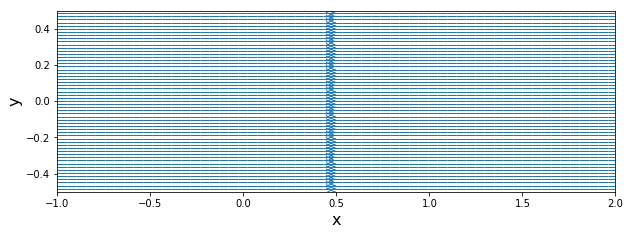

In [37]:
% matplotlib inline
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_total, v_total , density=2, linewidth=1, arrowsize=2, arrowstyle='->')
